In [996]:
%matplotlib inline

import os
import re

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimage
import numpy as np

In [997]:
# load paths/to/relevant/files

pwd = os.path.abspath('.')
data_dir = os.path.join(pwd, 'data')
img_dir = os.path.join(pwd,'imgs')

# parse directory for centroid, cluster_size datafiles
d_centroids, d_clust_size = {}, {}
filetypes = {'roids': d_centroids, 'cluster_size': d_clust_size}

for ftype, fdict in filetypes.iteritems():
    pattern = re.compile(r'(?P<file>.*[^_]*_(?P<round>.*)\.{}\.txt$)'.format(ftype))
    matches = (re.search(pattern, f) for f in os.listdir(data_dir))
    for m in matches:
        try:
            fdict[m.group('round')] = m.group('file')
        except:
            continue

# ..and dims datafile
pattern = re.compile(r'.*\.dims\.txt$')
matches = (re.search(pattern, f) for f in os.listdir(data_dir))
for m in matches:
    try:
        img_dims = m.group(0)
        break # one file only
    except:
        continue

# ..and corresponding images
d_imgs = {}
pattern = re.compile(r'(?P<file>.*[^_]*_(?P<round>.*)\.jpg$)'.format(ftype))
matches = (re.search(pattern, f) for f in os.listdir(img_dir))
for m in matches:
    try:
        d_imgs[m.group('round')] = m.group('file')
    except:
        continue

In [998]:
# load data by clustering round

with open(os.path.join(data_dir, img_dims), 'r') as f:
    dims = np.loadtxt(f)

def loadData(r):
    r = str(r)
    with open(os.path.join(data_dir, d_centroids[r]), 'r') as f:
        centroids = np.loadtxt(f)
    
    if r == 'init':
        clust_size = None
    else:
        with open(os.path.join(data_dir, d_clust_size[r]), 'r') as f:
            clust_size = np.loadtxt(f)
    
    centroids_yx, centroids_rgb = centroids[:,:2], centroids[:,2:]
    return (centroids_yx, centroids_rgb, clust_size)


def loadImage(r):
    r = str(r)
    with open(os.path.join(img_dir, d_imgs[r]), 'r') as f:
        return mpimage.imread(f)

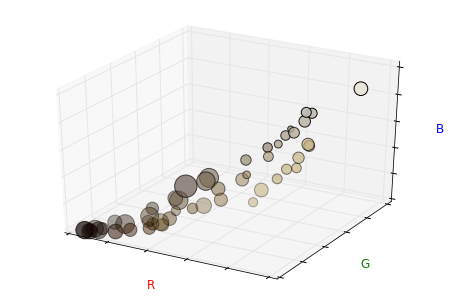

In [999]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# set axis ranges for colorspace
colorspace = [0,255]
ax.set_xlim(colorspace)
ax.set_ylim(colorspace)
ax.set_zlim(colorspace)

# set maximum point area
MAX_AREA = 500
r = MAX_AREA/max(clust_size)

# scale plot by factor N
N = 1.3
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

# add figure text
#fig.suptitle('Round {}'.format(ROUND), fontsize=14, fontweight='bold')
ax.set_xlabel('R', color='red', fontsize=12)
ax.set_ylabel('G', color='green', fontsize=12)
ax.set_zlabel('B', color='blue', fontsize=12)

# but remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

# add figure text
#ax.set_title('Round {}'.format(ROUND), fontsize=14, y=1.05)

ax.scatter(R, G, zs = B, c = colors, s = r*clust_size)

In [1000]:
height, width, ratio = dims

ROUND = '0'

centroids_yx, centroids_rgb, clust_size = loadData(ROUND)

# get centroid color data
data = centroids_rgb
R,G,B = [np.array(vals, dtype=np.int32) for vals in zip(*data)]

# normalize RGB to [0,1]
colors = [np.array(pt)/255. for pt in data]

In [1001]:
# get centroid location data
data = centroids_yx
y,x = [np.array(vals) for vals in zip(*data)]

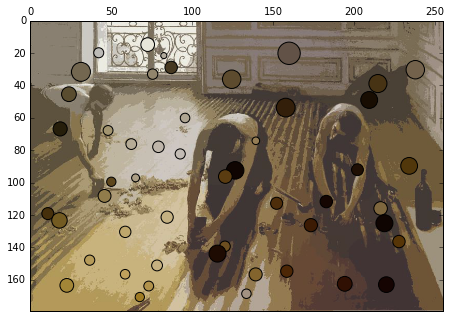

In [1002]:
fig = plt.figure()
ax = plt.gca()

# set maximum point radius
MAX_RADIUS = 500
r = MAX_RADIUS/max(clust_size)

ax.scatter(x, y, c = colors, s = r*clust_size)
#ax.scatter(x, y, c = colors)

# scale axes to image size (scaled if clustering scaled)
ax.set_xlim([0,width*ratio])
ax.set_ylim([0,height*ratio])
# set origin to top left, as per image array
ax.invert_yaxis()
ax.xaxis.tick_top()

# scale plot by factor N
N = 1.3
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

# with image
image = loadImage(ROUND)
plt.imshow(image, extent=[0,width*ratio,height*ratio,0], alpha=0.8)

# add figure text
#fig.suptitle('Round {}'.format(ROUND), fontsize=14, y=1.05)

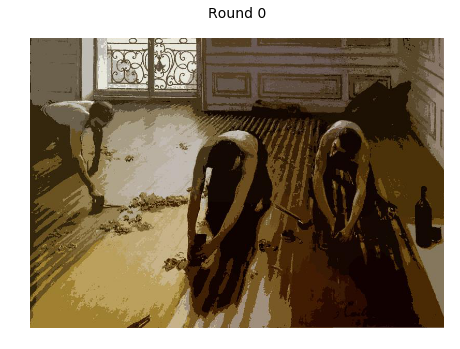

In [1003]:
fig = plt.figure()
ax = fig.add_subplot(111)

image = loadImage(ROUND)

# scale plot by factor N
N = 1.3
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

ax.set_title('Round {}'.format(ROUND), fontsize=14, y=1.05)

plt.axis("off")
plt.imshow(image)

In [1004]:
def video_inline(fname, options=['controls','autoplay','loop']):
    from IPython.display import HTML
    mimetype = os.path.splitext(fname)[-1].replace('.','')
    video_encoded = open(fname, "rb").read().encode("base64")
    tags = ' '.join(options)
    video_tag = '<video {} src="data:video/{};base64,{}">'.\
                        format(tags, mimetype, video_encoded)
    return HTML(data = video_tag)

def ani2vid(ani, outfile, options=None):
    ani.save(outfile, fps=0.2, writer=animation.FFMpegWriter(),
         extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
    # avoid displaying initial frame below vid
    plt.close(ani._fig)
    return video_inline(outfile, options) if options else video_inline(outfile)

In [1005]:
# set up permanent parts of fig
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# set axis ranges for colorspace
colorspace = [0,255]
ax.set_xlim(colorspace)
ax.set_ylim(colorspace)
ax.set_zlim(colorspace)

# set maximum point area
#MAX_AREA = 500
# TODO: make constant ?
#r = MAX_AREA/max(clust_size)
# currently: r is set by previous ratio in example above (ROUND 0: ~0.02)

# scale plot by factor N
N = 1.3
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

# add figure text
#fig.suptitle('Round {}'.format(ROUND), fontsize=14, fontweight='bold')
ax.set_xlabel('R', color='red', fontsize=12)
ax.set_ylabel('G', color='green', fontsize=12)
ax.set_zlabel('B', color='blue', fontsize=12)

# but remove tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

scat = ax.scatter([], [], zs=[], s=[], c=[])

def init():
    #centroids_yx, centroids_rgb, clust_size = loadData('init')
    #data = centroids_rgb
    #R,G,B = [np.array(vals, dtype=np.int32) for vals in zip(*data)]
    # normalize RGB to [0,1]
    #colors = [np.array(pt)/255.0 for pt in data]
    
    #scat._offsets3d = (R, G, B)
    #scat = ax.scatter([], [], zs=[], s=[], c=[])
    return scat,

# define update function for each round
def update(i):
    _, centroids_rgb, clust_size = loadData(i)
    # get centroid color data
    R,G,B = [np.array(vals, dtype=np.int32) for vals in zip(*centroids_rgb)]
    # normalize RGB to [0,1]
    colors = [np.array(pt)/255. for pt in centroids_rgb]
    # normalize sizes by ratio r
    sizes = r*clust_size
    
    # because of nonsense about changing color on 3D plots (see attempts below),
    # instead reset axis and redraw new scatter each round
    #ax.cla()
    global scat
    scat.remove()
    scat = ax.scatter(R, G, zs=B, c=colors, s=sizes)
    
    #scat._offsets3d = (R, G, B)
    #scat.set_sizes(sizes)
    #import matplotlib.colors
    #for rgb in colors:
    #    matplotlib.colors.ColorConverter.colors[str(rgb)] = tuple(rgb)
    #scat.set_array(np.array([str(rgb) for rgb in colors]))
    #plt.rcParams['patch.facecolor'] = str((1,1,1))
    #rgba = np.hstack((np.array(colors), [[0.5]] * len (colors)))
    #rgba_tups = [tuple(val) for val in rgba]
    #scat.set_facecolor(np.array(colors))
    #scat._facecolors3d = rgba
    #scat.set_array(np.array(colors).ravel())
    #scat.set(array=None, facecolors=np.array(colors))
    
    # return with commma to make iterable (necessary for blit=True)
    return scat,

OUTFILE = 'ani_rgb.mp4'
ani = animation.FuncAnimation(fig, update, init_func=init,
                              frames=5, interval=100000, blit=True,
                              repeat=True, repeat_delay=5000)
ani2vid(ani, OUTFILE)

In [1006]:
# set up new fig
fig = plt.figure()
ax = plt.gca()

# set maximum point radius
#MAX_RADIUS = 500
#r = MAX_RADIUS/max(clust_size)

# scale axes to image size (scaled if clustering scaled)
ax.set_xlim([0,width*ratio])
ax.set_ylim([0,height*ratio])
# set origin to top left, as per image array
ax.invert_yaxis()
ax.xaxis.tick_top()

# scale plot by factor N
N = 1.3
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

scat = ax.scatter([], [])

def init():
    return scat,

def update(i):
    centroids_yx, centroids_rgb, clust_size = loadData(i)
    
    # get centroid location data
    y,x = [np.array(vals) for vals in zip(*centroids_yx)]
    # get centroid color data
    R,G,B = [np.array(vals, dtype=np.int32) for vals in zip(*centroids_rgb)]
    # normalize RGB to [0,1]
    colors = [np.array(pt)/255. for pt in centroids_rgb]
    # normalize sizes by ratio r
    sizes = r*clust_size

    global scat
    scat.remove()
    scat = ax.scatter(x, y, c=colors, s=sizes)
    
    return scat,


OUTFILE = 'ani_xy.mp4'
ani = animation.FuncAnimation(fig, update, init_func=init, #fargs=(scat),
                              frames=5, interval=100000, blit=True,
                              repeat=True, repeat_delay=5000)
ani2vid(ani, OUTFILE)

In [950]:
# set up new fig
fig = plt.figure()
ax = plt.gca()

# scale plot by factor N
N = 1.5
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

# hide axis
plt.axis("off")

# add figure text
title = ax.set_title('', fontsize=14, y=1.05)

im = plt.imshow(np.empty_like(loadImage(ROUND)))

def init():
    return im,

def update(i):
    image = loadImage(i)
    im.set_array(image)
    title.set_text('Round {}'.format(i))
    return im,title

OUTFILE='ani_imgs.mp4'
ani = animation.FuncAnimation(fig, update, init_func=init,
                              frames=5, interval=1000, blit=True,
                              repeat=True, repeat_delay=500000, save_count=10000000000)
ani2vid(ani, OUTFILE, ['controls', 'autoplay'])

In [1007]:
# all together now: centroid locations, overlaid on image, with round #

# set up new fig
fig = plt.figure()
ax = plt.gca()

# set maximum point radius
#MAX_RADIUS = 500
#r = MAX_RADIUS/max(clust_size)

# scale axes to image size (scaled if clustering scaled)
ax.set_xlim([0,width*ratio])
ax.set_ylim([0,height*ratio])
# set origin to top left, as per image array
ax.invert_yaxis()
ax.xaxis.tick_top()

# scale plot by factor N
N = 2.0
params = plt.gcf()
figDims = fig.get_size_inches()
params.set_size_inches(N*dim for dim in figDims)

scat = ax.scatter([], [])
im = plt.imshow(np.empty_like(loadImage(ROUND)),
                extent=[0,width*ratio,height*ratio,0],
                alpha=0.95)
#title = ax.set_title('', fontsize=14, y=1.05)

def init():
    return scat,im#,title

def update(i):
    centroids_yx, centroids_rgb, clust_size = loadData(i)
    
    # get centroid location data
    y,x = [np.array(vals) for vals in zip(*centroids_yx)]
    # get centroid color data
    R,G,B = [np.array(vals, dtype=np.int32) for vals in zip(*centroids_rgb)]
    # normalize RGB to [0,1]
    colors = [np.array(pt)/255. for pt in centroids_rgb]
    # normalize sizes by ratio r
    sizes = r*clust_size

    global scat
    scat.remove()
    scat = ax.scatter(x, y, c=colors, s=sizes)
    
    im.set_array(loadImage(i))
    
    #title.set_text('Round {}'.format(i))
    
    return scat,im#,title


OUTFILE = 'ani_xy_img.mp4'
ani = animation.FuncAnimation(fig, update, init_func=init, #fargs=(scat),
                              frames=5, interval=100000, blit=True,
                              repeat=True, repeat_delay=5000)
ani2vid(ani, OUTFILE)

In [917]:
######################################################################################

In [921]:
######################################################################################

In [922]:
# automatically embed inline animation in iPython notebook
# http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/
# http://nbviewer.jupyter.org/gist/edrex/9044756/mpl_animation_html.ipynb

from tempfile import NamedTemporaryFile
from matplotlib import animation

VIDEO_TAG = """<video controls autoplay>
 <source type="video/mp4" src="data:{}">
 Your browser does not support the video tag.
</video>"""

def anim_to_html(anim):
    #plt.close(anim._fig)
    if not hasattr(anim, '_encoded_video'):
        with NamedTemporaryFile(suffix='.m4v') as f:
            anim.save(f.name,# fps=5,
                      extra_args=['-vcodec', 'libx264', '-pix_fmt', 'yuv420p'])
            with open(f.name,"rb") as vid:
                video = vid.read()
    anim._encoded_video = 'video/mp4;base64,' + video.encode("base64")
    # prevent figure displayed as a PNG below the animation
    #plt.close()
    return VIDEO_TAG.format(anim._encoded_video)

# override base animation class method for HTML representation
animation.Animation._repr_html_ = anim_to_html

def display_animation(anim):
    from IPython.display import HTML
    plt.close(anim._fig)
    return HTML(anim_to_html(anim))

In [693]:
# N.B. https://github.com/matplotlib/matplotlib/issues/5508/
#ani.to_html5_video()

#from matplotlib import rcParams
#rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

#animation.FuncAnimation(fig, update, init_func=init,
#                        frames=5, interval=20, blit=True)

#display_animation(ani)

In [696]:
# TEST

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)

display_animation(ani)

In [697]:
# TEST

#import base64

#class base64(base64):
#    def encodebytes(self,)
import tempfile

class myAni(animation.FuncAnimation):
    #overrwrite!!
    def to_html5_video(self):
        r'''Returns animation as an HTML5 video tag.

        This saves the animation as an h264 video, encoded in base64
        directly into the HTML5 video tag. This respects the rc parameters
        for the writer as well as the bitrate. This also makes use of the
        ``interval`` to control the speed, and uses the ``repeat``
        paramter to decide whether to loop.
        '''
        VIDEO_TAG = r'''<video {size} {options}>
  <source type="video/mp4" src="data:video/mp4;base64,{video}">
  Your browser does not support the video tag.
</video>'''
        # Cache the the rendering of the video as HTML
        if not hasattr(self, '_base64_video'):
            # First write the video to a tempfile. Set delete to False
            # so we can re-open to read binary data.
            with tempfile.NamedTemporaryFile(suffix='.m4v',
                                             delete=False) as f:
                # We create a writer manually so that we can get the
                # appropriate size for the tag
                #Writer = writers[rcParams['animation.writer']]
                Writer = animation.FFMpegWriter
                writer = Writer(codec='h264',
                                bitrate=rcParams['animation.bitrate'],
                                fps=1000. / self._interval)
                self.save(f.name, writer=writer)

            # Now open and base64 encode
            with open(f.name, 'rb') as video:
                #vid64 = base64.encodebytes(video.read())
                vid64 = video.read().encode("base64")
                self._base64_video = vid64.decode('ascii')
                self._video_size = 'width="{0}" height="{1}"'.format(
                        *writer.frame_size)

            # Now we can remove
            os.remove(f.name)

        # Default HTML5 options are to autoplay and to display video controls
        options = ['controls', 'autoplay']

        # If we're set to repeat, make it loop
        if self.repeat:
            options.append('loop')
        return VIDEO_TAG.format(video=self._base64_video,
                                size=self._video_size,
                                options=' '.join(options))

ani = myAni(fig, animate, init_func=init,
           frames=100, interval=20, blit=True)

#ani = myAni(fig, update, init_func=init,
#            frames=5, interval=20, blit=True)

h = ani.to_html5_video()
HTML(h)

In [698]:
HTML("""
<video width="320" height="240" controls>
  <source src="/Volumes/Media/workspace/rc/k-meanz/ipython/ani.mp4" type="video/mp4">
</video>
""")